In [69]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans

# Etapa 2

<bound method NDFrame.head of                  Diagnosis Age  Fraction Genome Altered  Longest Dimension  \
Sample ID                                                                    
TCGA-05-4244-01           70.0                   0.4565                1.1   
TCGA-05-4249-01           67.0                   0.2221                1.4   
TCGA-05-4250-01           79.0                   0.2362                1.2   
TCGA-05-4382-01           68.0                   0.0854                0.9   
TCGA-05-4384-01           66.0                   0.0661                0.8   
...                        ...                      ...                ...   
TCGA-NJ-A55O-01           56.0                   0.0194                NaN   
TCGA-NJ-A55R-01           67.0                   0.0760                NaN   
TCGA-NJ-A7XG-01           49.0                   0.4205                NaN   
TCGA-O1-A52J-01           74.0                   0.5443                NaN   
TCGA-S2-AA1A-01           68.0    

C:\Users\jfpal\AppData\Local\Temp\ipykernel_8236\1176434966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_meta['Diagnosis Age'].fillna(new_meta['Diagnosis Age'].mean(),inplace=True)
C:\Users\jfpal\AppData\Local\Temp\ipykernel_8236\1176434966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_meta['Fraction Genome Altered'].fillna(new_meta['Fraction Genome Altered'].mean(),inplace=True)
C:\Users\jfpal\AppData\Local\Temp\ipykernel_8236\1176434966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

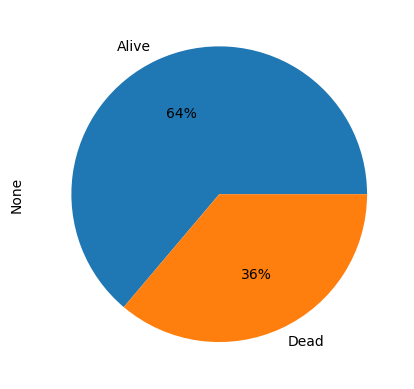

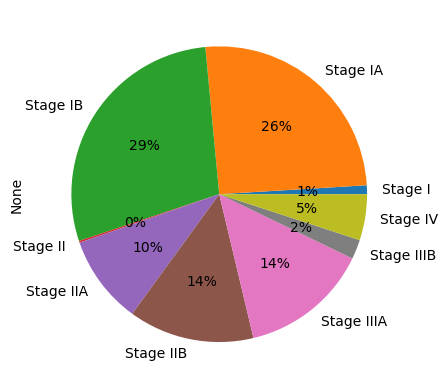

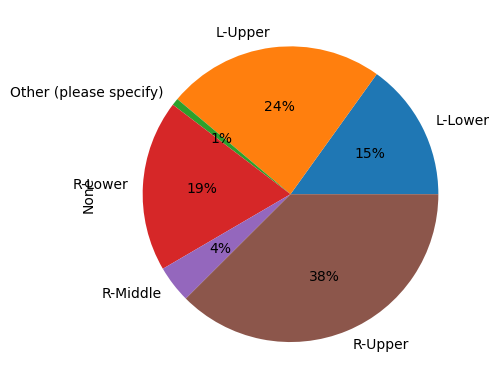

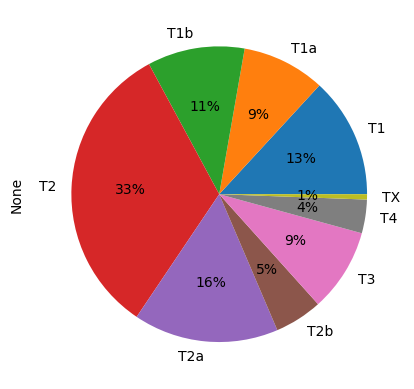

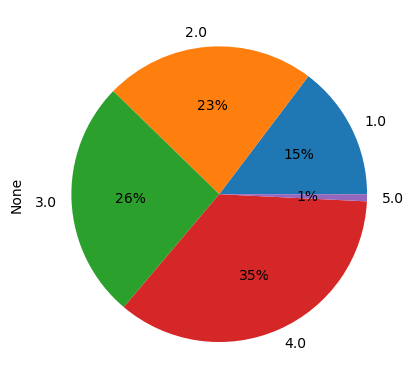

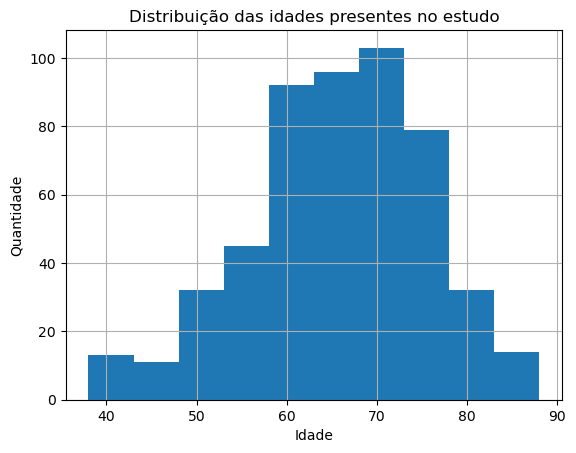

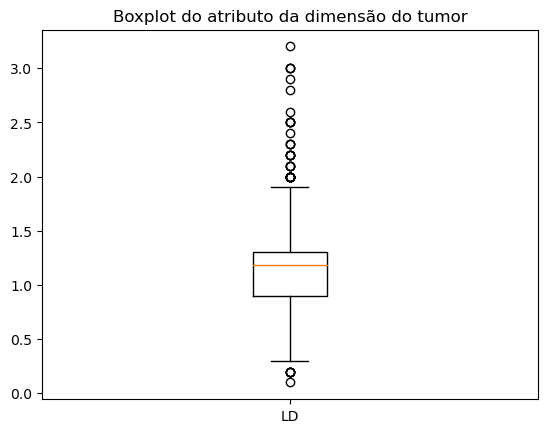

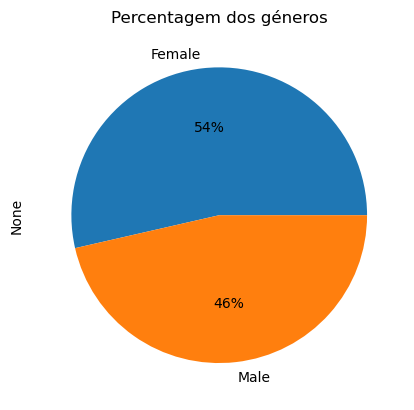

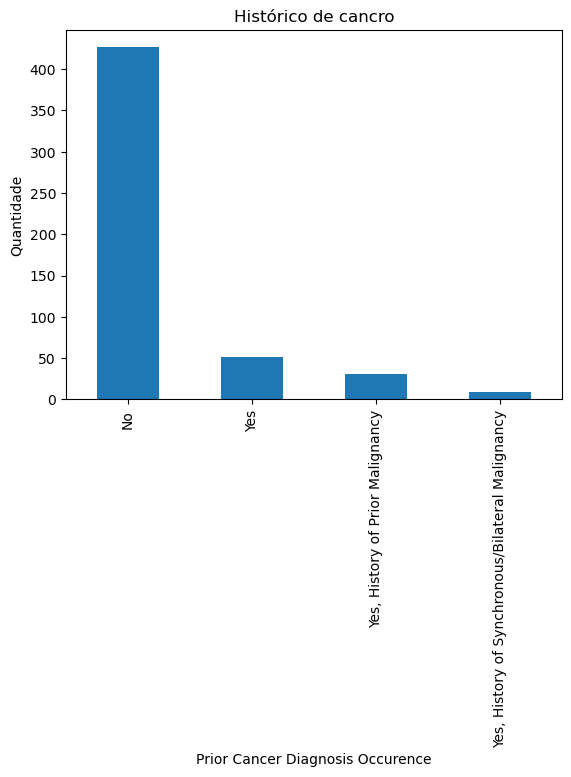

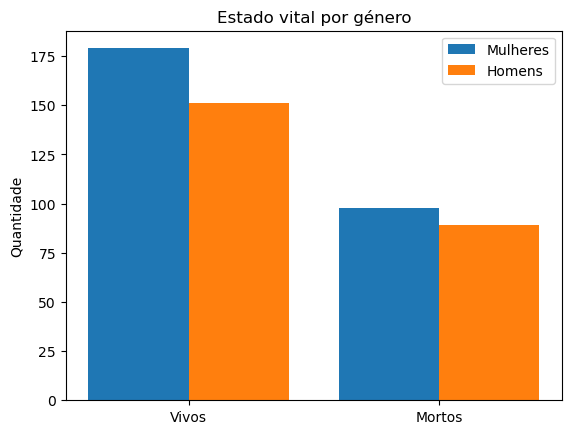

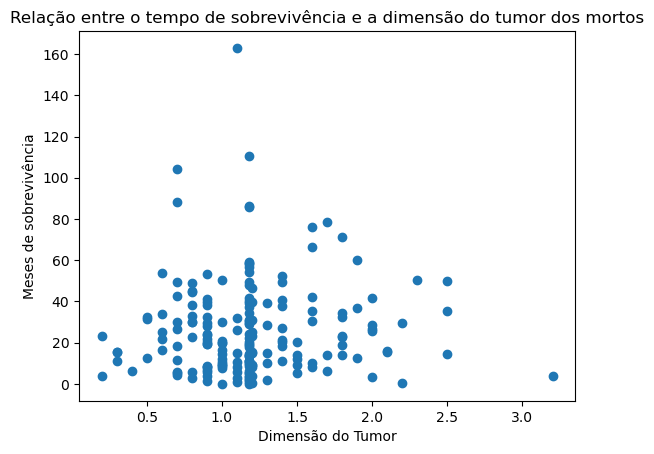

In [2]:
%run \Users\jfpal\Downloads\Trabalho\etapa1.ipynb

In [3]:
# análise dos genes
data_hugo_luad.transpose().describe()

Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,...,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.019793,12.563599,13.772414,109.191745,921.412556,0.000518,200.965270,0.456712,0.144994,0.0,...,48.018296,383.145637,1082.626088,61.012445,849.987180,4049.562512,1080.205735,710.462033,127.999331,0.176634
std,0.110964,10.824164,11.507095,54.083375,362.542965,0.011769,156.827547,0.605640,1.625181,0.0,...,21.424549,169.977557,339.329517,74.516301,259.159593,1869.604727,440.005370,319.317913,251.016470,0.896453
min,0.000000,0.000000,0.000000,36.357000,270.115400,0.000000,11.022000,0.000000,0.000000,0.0,...,8.879000,34.099400,311.314600,0.000000,264.413200,446.043200,183.841200,219.603600,0.685400,0.000000
25%,0.000000,5.357900,5.888000,78.785300,671.334600,0.000000,89.459200,0.000000,0.000000,0.0,...,34.482800,276.152700,851.610700,5.879200,675.758400,2650.125500,776.395500,548.513500,10.759700,0.000000
50%,0.000000,10.456700,11.282000,97.173100,848.939700,0.000000,160.488400,0.305600,0.000000,0.0,...,44.308600,346.751700,1040.429600,37.424400,815.834800,3811.870500,1033.582100,663.253200,25.665900,0.000000
75%,0.000000,16.079700,17.981600,122.073800,1072.048400,0.000000,269.594000,0.746300,0.000000,0.0,...,58.514100,463.612700,1257.618600,86.475300,978.162000,5176.296700,1339.449500,807.746300,128.659200,0.000000
max,1.328100,84.739200,107.370500,677.255900,2678.614800,0.267600,1477.014100,5.281000,33.737500,0.0,...,217.434200,1749.691600,3016.414100,472.129300,2453.159500,15291.709300,2811.271300,4961.792200,2692.689000,13.407300


## Organização

Passo 1:
Para filtrar os dados temos 2 alternativas: variance threshold e análise estatística univariada.
O primeiro não tem em conta os metadados, mas o outro sim.
Ttest para duas classes, ANOVA para mais de 2 classes e análise linear para dados numéricos.

Passo 2:
Standarizar os dados para o PCA.
Esta análise PCA permite observar como se organizam os dados tendo em contas as primeiras PCs.
O mesmo PCA pode ser feito com diversas variáveis dos metadados.

Passo 3:
O clustering permite confirmar ou não padrões nos dados, tal como o PCA.

A análise desta etapa é o que vai permitir prosseguir para a seguinte porque vai tornar posível a seleção de dados estatisticamente relevantes e ver qual a label que se pretende prever com os algoritmos da terceira etapa.

# Análise Univariada e Filtros

In [57]:
# obter apenas a matriz dos valores
data = data_hugo_luad.transpose().values
#data = data_hugo_luad.values
print(data.shape)

(517, 20529)


In [64]:
print('Dados originais')
# variância
variances = data.var(axis = 0) # calcula a variância de cada gene
print(variances.shape)
medvar = variances.mean() # faz a média de todos
print('Var:', medvar)
# desvio padrão
std = data.std()
medstd = std.mean()
print('Std:', medstd)

Dados originais
(20529,)
Var: 14004342.851514589
Std: 5100.288514458408


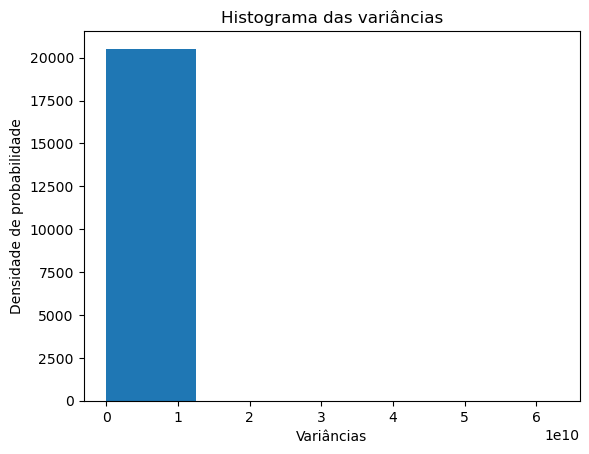

In [65]:
plt.hist(variances, bins = 5)
plt.xlabel('Variâncias')
plt.ylabel('Densidade de probabilidade')
plt.title('Histograma das variâncias')
plt.show()

Observando o gráfico representado verifica-se que é um gráfico  assimétrico à esquerda. Existe um pico no intervalo de variância de 0 a 1.2 que são os valores mais comuns de variância para a densidade de probabilidade, ou seja, as variâncias estão concentradas.

### Filtro Variance Threshold

In [66]:
# Este filtro permite fazer a redução da dimensionalidade do dataset
# Remove features com reduzida variância
sel = VarianceThreshold(threshold=medvar*3)
input_filt = sel.fit_transform(data)
print(input_filt.shape)

(517, 306)


Primeiramente, aplicou-e o filtro de variance threshold que permite filtrar apenas as features com elevada variância. Este filtro reduziu os 20529 genes para 306 genes, logo, ocorreu uma redução significativa.

In [67]:
print('Novos dados')
# variância
variances = input_filt.var(axis = 0)
print(variances.shape)
medvar = variances.mean()
print('Var:', medvar)
# desvio padrão
std_new = input_filt.std()
print('Std:',std_new)

Novos dados
(306,)
Var: 889978068.7234744
Std: 36245.131712638205


Tanto a variâncias quanto o desvio padrão aumentaram significativamente.
É importante que os genes com baixa variância sejam eliminados porque uma baixa variância significa que os atributos são muito semelhantes e, neste caso, não contém muita informação e não contribuem para a conclusão a encontrar. 
Por outro lado, os dados com elevada variância mantêm-se tendo em conta que uma elevada variância significa que existem diferentes valores do gene e o que permite tecer conclusões mais relevantes.

### Análise estatística univariada

A análise univariada inclui todos os métodos de Estatística Descritiva que permite a análise de cada variável separadamente e também métodos de Estatística Inferencial para uma determinada variável.

In [68]:
# Análise de variância simples, t-teste
# fclassif - ANOVA ou t-test
new_data = data_hugo_luad.transpose()

# genes diferencialmente expressos, seleciona genes com menor p-value (os 10% com menor valor)
selector = SelectPercentile(f_classif, percentile=10)

# Vital State
output_status = new_meta.iloc[:,6]
selector.fit_transform(new_data, output_status)
genes_status = np.where(selector.pvalues_ <0.01)
print(len(new_data.columns[genes_status]))
print(new_data.columns[genes_status])

C:\Users\jfpal\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    9    15    23  1624  1749  3526  3527  4318  4375  4639  4655  4807
  4809  4811  4814  4815  4816  4817  4819  4822  4829  4831  4834  5288
  7661  7662  7663  7664  7665  9304  9306  9309  9314  9316  9320  9321
  9323  9350  9351  9452  9830 10121 10295 11957 12372 12381 12386 12478
 12489 12503 12514 12521 12544 12552 12554 12556 12558 12579 12621 12626
 12627 12629 12637 12643 12645 12653 12654 12663 12667 12671 12681 12682
 12688 12690 12717 12720 12721 12723 12733 13465 13519 13776 13990 14157
 14158 14160 15018 15137 15139 15140 15445 16565 16566 16567 16568 16570
 16571 16573 16574 16577 16578 16579 16603 16633 16676 16696 16698 16699
 16700 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712
 16713 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724
 16725 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736
 16

1835
Index(['RNU12-2P', 'A2M', 'AAMP', 'ABCA2', 'HSA275973', 'ABCA6', 'ABCC2',
       'ABCD1', 'ABCD2', 'ABCE1',
       ...
       'ZNF836', 'ZNF844', 'LOC641907', 'ZNRF3', 'ZP3', 'ZSWIM3', 'ZWILCH',
       'ZWINT', 'LOC100130182', 'FLJ10821'],
      dtype='object', name='Hugo_Symbol', length=1835)


In [10]:
# Cancer Stage
output_stage = new_meta.iloc[:,7]
selector.fit_transform(new_data, output_stage)
genes_status = np.where(selector.pvalues_ <0.01)
print(len(new_data.columns[genes_status]))
print(new_data.columns[genes_status])

1647
Index(['LOC155060', 'LOC553137', 'RBFOX1', 'A2M', 'AAAS', 'AATF', 'PRO2543',
       'HSA275973', 'ABCA6', 'ABCA7',
       ...
       'ZNF808', 'ZNF831', 'ZNF836', 'ZNF83', 'LOC641907', 'ZP3', 'ZRSR2',
       'ZSCAN18', 'ZSCAN1', 'LOC100130182'],
      dtype='object', name='Hugo_Symbol', length=1647)


C:\Users\jfpal\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    9    15    23  1624  1749  3526  3527  4318  4375  4639  4655  4807
  4809  4811  4814  4815  4816  4817  4819  4822  4829  4831  4834  5288
  7661  7662  7663  7664  7665  9304  9306  9309  9314  9316  9320  9321
  9323  9350  9351  9452  9830 10121 10295 11957 12372 12381 12386 12478
 12489 12503 12514 12521 12544 12552 12554 12556 12558 12579 12621 12626
 12627 12629 12637 12643 12645 12653 12654 12663 12667 12671 12681 12682
 12688 12690 12717 12720 12721 12723 12733 13465 13519 13776 13990 14157
 14158 14160 15018 15137 15139 15140 15445 16565 16566 16567 16568 16570
 16571 16573 16574 16577 16578 16579 16603 16633 16676 16696 16698 16699
 16700 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712
 16713 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724
 16725 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736
 16

In [11]:
# Tumor Site
output_site = new_meta.iloc[:,8]
selector.fit_transform(new_data, output_site)
genes_status = np.where(selector.pvalues_ <0.01)
print(len(new_data.columns[genes_status]))
print(new_data.columns[genes_status])

C:\Users\jfpal\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    9    15    23  1624  1749  3526  3527  4318  4375  4639  4655  4807
  4809  4811  4814  4815  4816  4817  4819  4822  4829  4831  4834  5288
  7661  7662  7663  7664  7665  9304  9306  9309  9314  9316  9320  9321
  9323  9350  9351  9452  9830 10121 10295 11957 12372 12381 12386 12478
 12489 12503 12514 12521 12544 12552 12554 12556 12558 12579 12621 12626
 12627 12629 12637 12643 12645 12653 12654 12663 12667 12671 12681 12682
 12688 12690 12717 12720 12721 12723 12733 13465 13519 13776 13990 14157
 14158 14160 15018 15137 15139 15140 15445 16565 16566 16567 16568 16570
 16571 16573 16574 16577 16578 16579 16603 16633 16676 16696 16698 16699
 16700 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712
 16713 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724
 16725 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736
 16

492
Index(['ABCC13', 'ACADL', 'ACOX2', 'ACOXL', 'LOC116107', 'ADAM19', 'ADAM30',
       'DJ964F7.1', 'ADAMTSL3', 'ADCK1',
       ...
       'ZNF432', 'ZNF536', 'AC006272.1', 'ZNF613', 'ZNF615', 'LOC729906',
       'ZNF732', 'ZNF813', 'LOC101929933', 'ZSCAN23'],
      dtype='object', name='Hugo_Symbol', length=492)


Para além do filtro do variance threshold, aplicou-se ainda análise estatística univariada, que se relaciona com os metadados para analisar se teria melhor desempenho da redução da dimensionalidade do dataset.
No entanto, tendo em conta os resultados obtidos acima, verificou-se que o filtro que melhor se adequa é o VarianceThreshold, já que é o filtro que mais reduz a dimensionalidade do dataset e não utiliza os metadados para essa filtragem de dados.
Posto isto, torna-se necessário na próxima etapa compreender de que forma os genes filtrados se relacionam com as variáveis dos metadados.

# Análise Multivariada não supervisionada

A análise multivariada inclui os métodos de análise das relações de múltiplas variáveis dependentes e/ou independentes, que se estabeleçam ou não relações de causa/efeito entre os dois grupos. Só os métodos de Estatística Multivariada permitem que se explore a performance conjunta das variáveis e se determine a influência ou importância de cada uma, estando as restantes presentes.

In [70]:
# standardizacao dos dados reduzidos
input_sc = preprocessing.scale(input_filt)
print("Media: ", input_sc.mean())
print("Desvio padrao: ", input_sc.std())

Media:  6.557391146823342e-18
Desvio padrao:  0.9999999999999999


### PCA -  Principal Component Analysis

In [45]:
pca = PCA(n_components=20)
X_r = pca.fit(input_sc).transform(input_sc)
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

Var. explicada: [0.12586069 0.06506819 0.05869185 0.03779807 0.03338944 0.02920949
 0.02305396 0.02243933 0.02039494 0.01816408 0.01457668 0.01356664
 0.01213598 0.01111041 0.01067915 0.00954975 0.00880075 0.00831896
 0.00791585 0.00766917]


0.5383933961511829

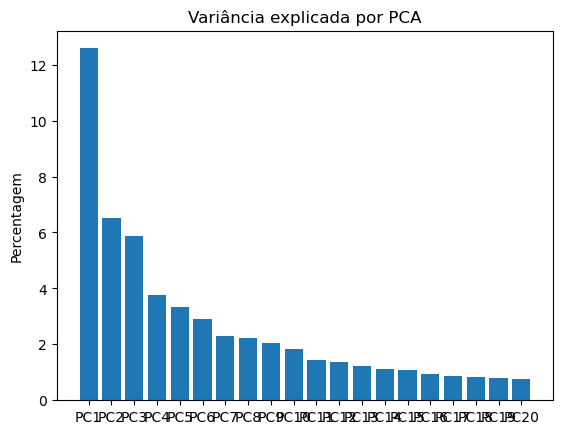

In [46]:
n = 20
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PCA")
plt.ylabel("Percentagem")
plt.show()

Na análise PCA, fez-se o teste com vários valores diferentes de componentes. Apenas selecionando 15 ou mais componentes é que se tornou possível obter uma variância superior a 50%.
Pela observação do gráfico, este apresenta o comportamento típico decrescente e nos componentes iniciais há uma maior concentração das variâncias, o que significa que há maior dipersão dos dados e, por isso, mais informação neles contida.

No próximo passo pretende-se relacionar o conteúdo das primeiras PCs por forma a identificar possíveis padrões de relação dos genes filtrados com as variáveis dos metadados.

Na etapa 1 do trabalho, trataram-se e selecionaram-se 11 variáveis dos metadados que poderiam conter informação relevante.
Nesta fase, vamos apenas realizar o estudo PCA para aquelas que consideramos biologicamente relevantes.

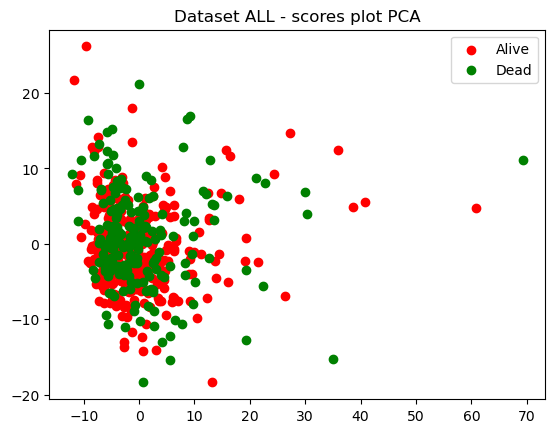

In [71]:
# PCA relacionado com o Status
plt.figure()
for c, name in zip("rgb", ["Alive", "Dead"]):
    plt.scatter(X_r[output_status == name, 0], X_r[output_status == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

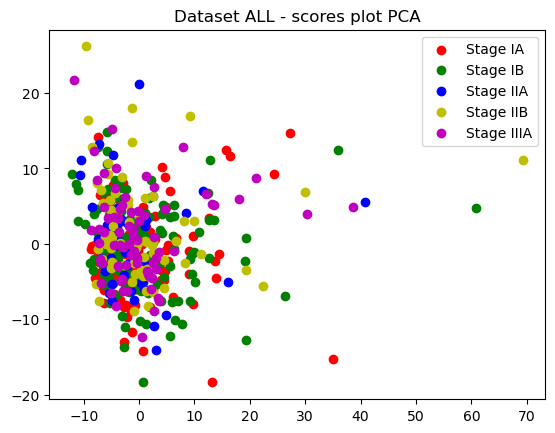

In [72]:
# PCA relacionado com o Stage
colors=("r","g","b","y","m")
labels=("Stage IA","Stage IB","Stage IIA","Stage IIB","Stage IIIA")
plt.figure()
for c, name in zip(colors,labels):
    plt.scatter(X_r[output_stage == name, 0], X_r[output_stage == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

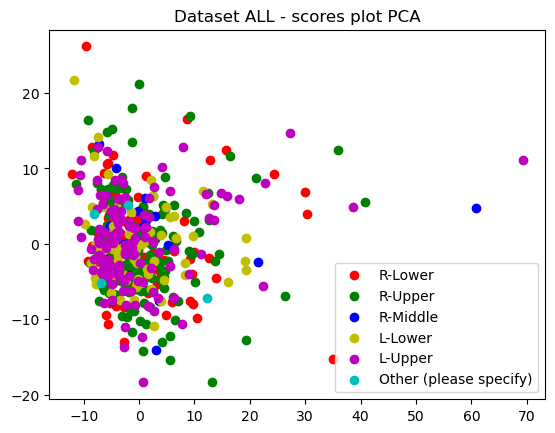

In [49]:
# PCA relacionado com o Site
colors=("r","g","b","y","m","c")
labels=("R-Lower","R-Upper","R-Middle","L-Lower","L-Upper","Other (please specify)")
plt.figure()
for c, name in zip(colors,labels):
    plt.scatter(X_r[output_site == name, 0], X_r[output_site == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

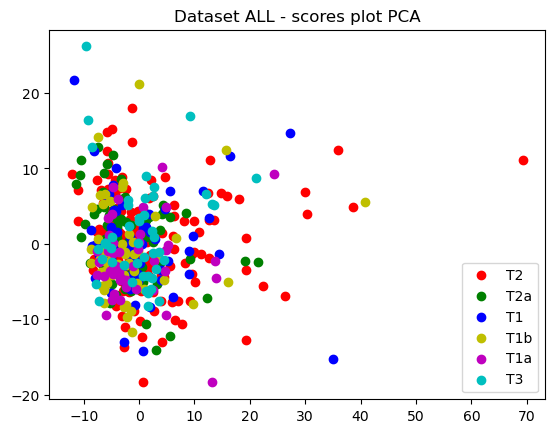

In [50]:
# PCA relacionado com o Stage Code
colors=("r","g","b","y","m","c")
labels=("T2","T2a","T1","T1b","T1a","T3")
plt.figure()
for c, name in zip(colors,labels):
    plt.scatter(X_r[output_code == name, 0], X_r[output_code == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

Após esta analise, e não tendo obtido uma distinção clara entre as classes de cada variável dos metadados testada, concluiu-se que, ainda assim, o atributo com maior importância para o estudo seria o Vital Status do paciente, uma vez que apenas possui duas classes (Dead ou Alive) e se obtiveram resultados relativamente mais satisfatórios.

### Dendograma

O Dendrograma resulta de uma análise estatística de determinados dados, operando
um método quantitativo que leva a agrupamentos e à sua ordenação hierárquica ascendente.
Usa-se o Dendograma para visualizar o processo de clusterização passo a passo, assim
como analisar os níveis de distância dos clusters formados. Considera-se um bom ponto
de decisão da clusterização final quando os valores de distância mudam consideravelmente.

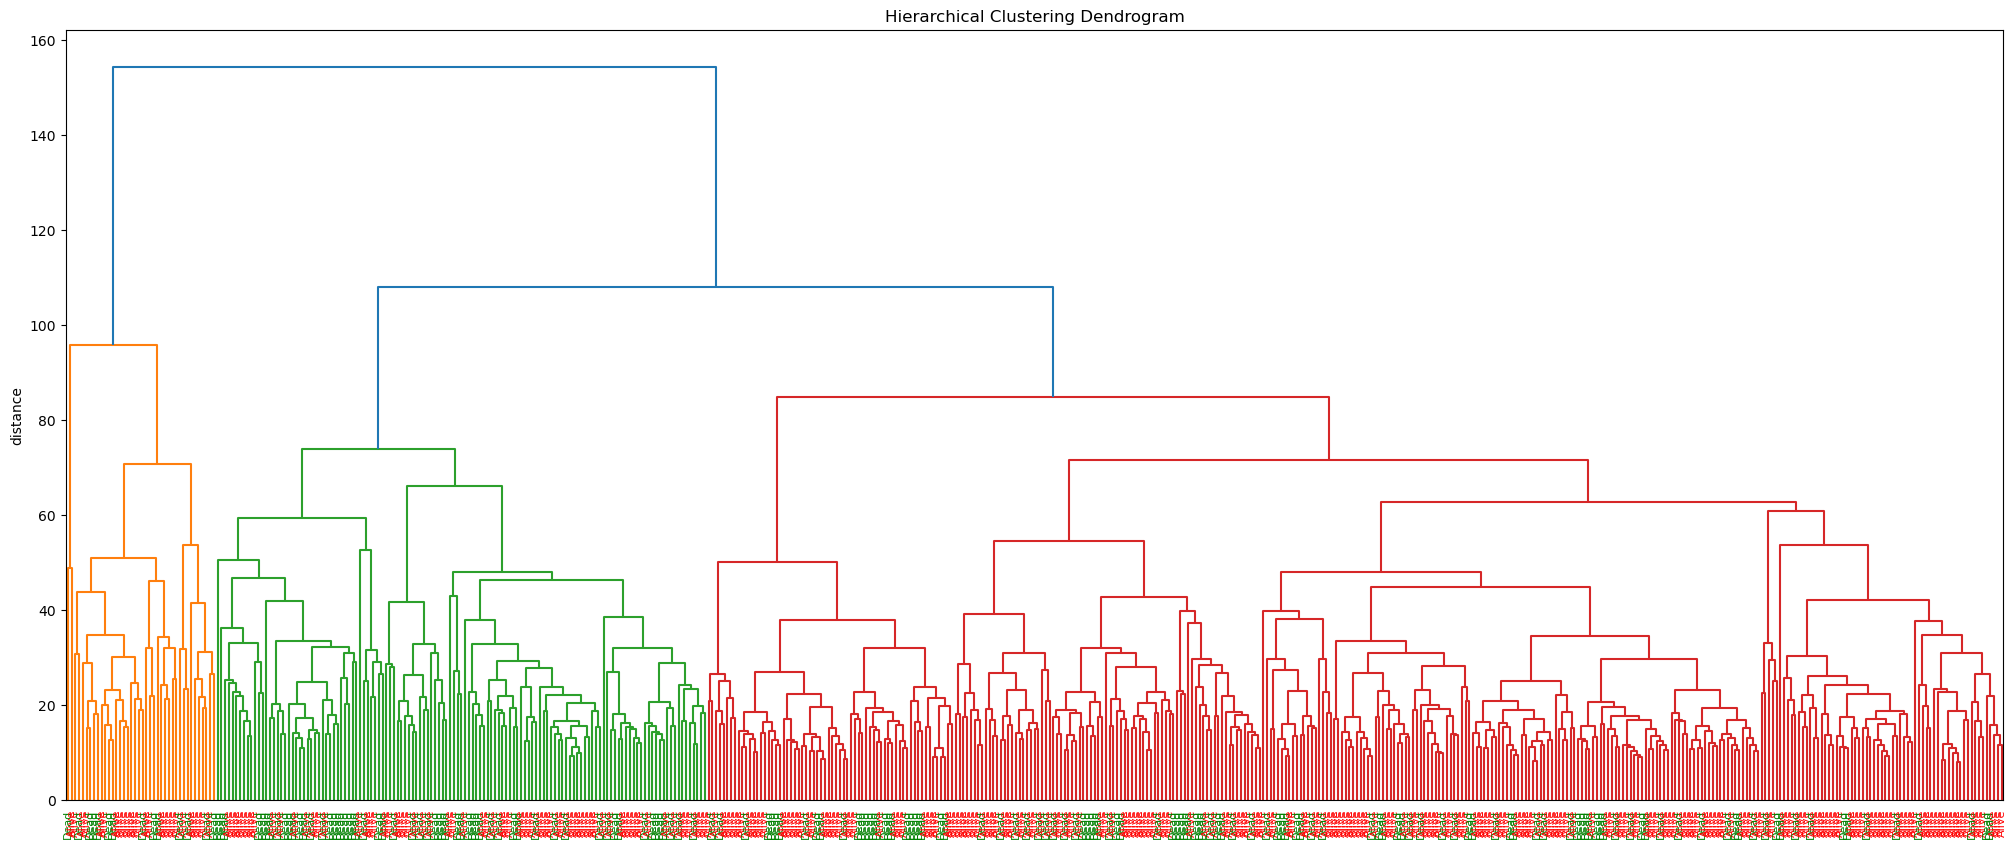

In [21]:
# Dendograma relacionado com o Status
Z = linkage(input_sc, method='ward', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(output_status),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'Alive': 'r', 'Dead': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

Tendo em conta o gráfico obtido, pode verificar-se a distinção de três clusters diferentes. Em cada um deles, observam-se amostras com o Status de Alive e de Dead. No fundo, esta analise reforça os resultados obtidos na análise do PCA em que não se encontrou um padrão bem definido.

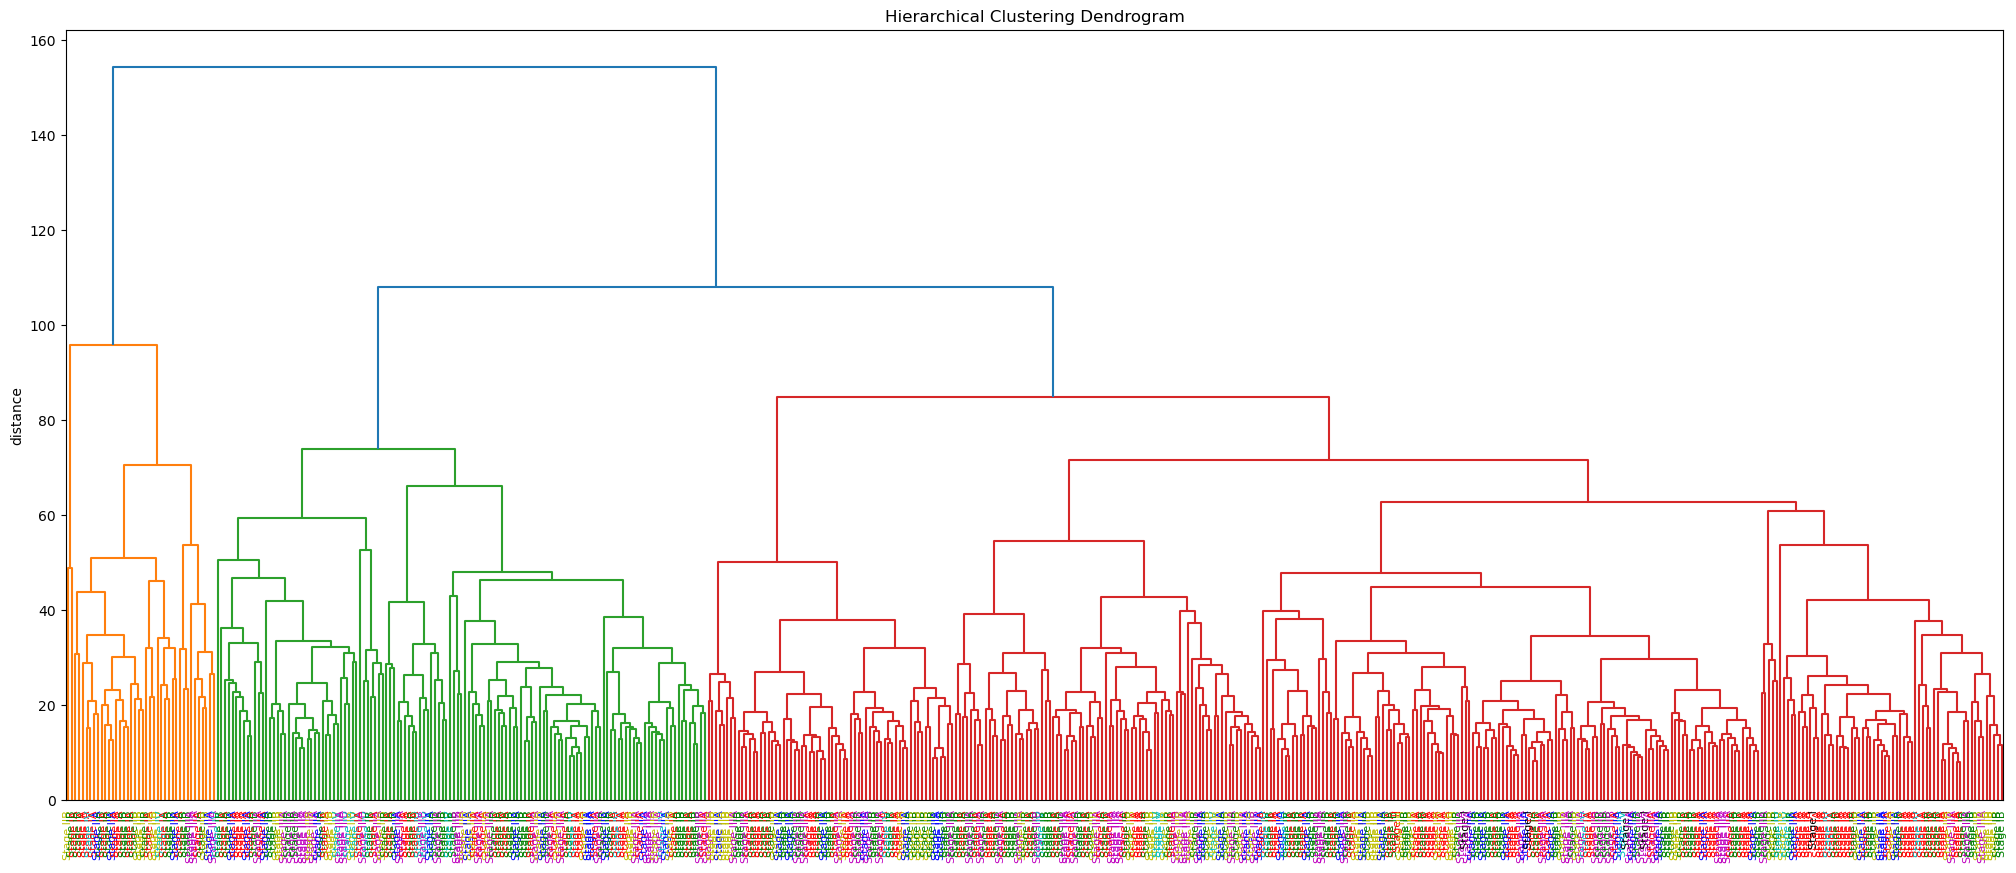

In [81]:
# Dendograma relacionado com o Stage
# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(output_stage),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {"Stage IA": 'r', "Stage IB": 'g',"Stage IIA":'b',"Stage IIB":'y',"Stage IIIA":'m',"Stage IV":'c',"Stage IIIB":'m',"Stage I":'k',"Stage II":'r'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

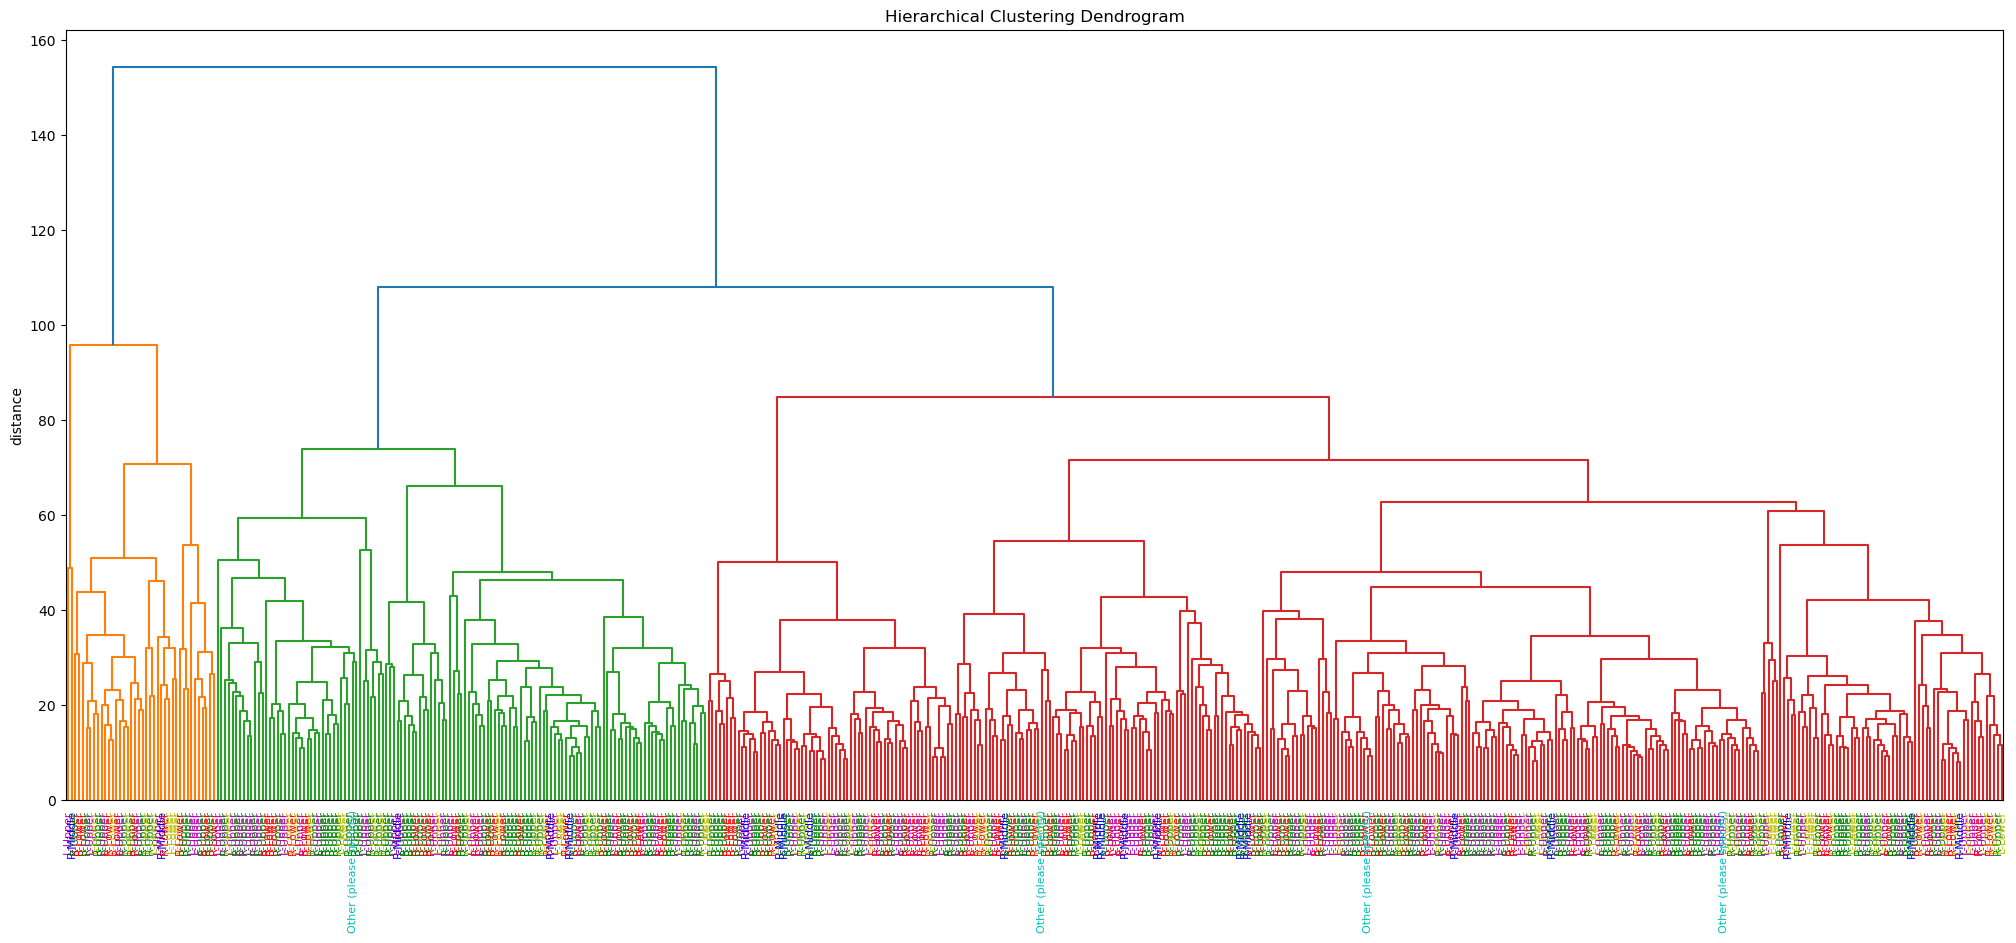

In [22]:
# Dendograma relacionado com o Site
# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(output_site),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {"R-Lower": 'r', "R-Upper": 'g',"R-Middle":'b',"L-Lower":'y',"L-Upper":'m',"Other (please specify)":'c'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

Fez-se a análise PCA com outras duas variáveis também (Stage e Site) e não foi encontrado nenhum padrão, como seria de prever.

### Clustering Hierárquico

Na mineração de dados e estatísticas, o agrupamento hierárquico é uma técnica de 
clusterização de dados que baseia-se no tamanho e distância dos dados em um conjunto. 
De seguida, ilustra-se o arranjo de clusters derivado da aplicação de um algoritmo de 
clustering hierárquico, por afinidade euclidiana.

In [82]:
# clustering hierárquico
hclust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
hclust.fit(input_sc)

AgglomerativeClustering()

In [83]:
# relacionar com alive e dead
res_hc = hclust.labels_
pd.crosstab(output_status, res_hc)

col_0,0,1
Patient's Vital Status,,
Alive,304,26
Dead,173,14


Por conseguinte, verifica-se que todos os clusters possuem amostras das duas classes e o número de indivíduos vivos (Alive) é relativamente superior ao número de indivíduos mortos (Dead), nas duas amostras de clusters realizadas. Em ambos a percentagem de Alive ronda os 65%.

### K-Means

Para processar os dados de aprendizagem, o algoritmo K-means na mineração de dados começa com um primeiro grupo de centróides seleccionados aleatoriamente, que são utilizados como pontos de partida para cada agrupamento, e depois executa cálculos iterativos (repetitivos) para optimizar as posições dos centróides. Assim, o método do K-Means tem como objetivo agrupar os dados de acordo com a sua proximidade a um centróide, num determinado número de clusters definidos pelo utilizador.

In [84]:
# k-means
kmeans_est = KMeans(init='random', n_clusters=2, n_init = 100)
res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

In [85]:
# relacionar com alive e dead
pd.crosstab(output_status, res_kmeans)

col_0,0,1
Patient's Vital Status,,
Alive,299,31
Dead,158,29


Após avaliação, verifica-se que em ambos os clusters existem amostras das duas classes mas no segundo cluster o valor de ambos é balanceado (50/50 aproximandamente).